In [77]:
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
import numpy as np
import geopandas as gpd


In [78]:
df = pd.read_csv('../data/collisions_routieres.csv')
mapbox_token = "pk.eyJ1IjoidG91amVyMDAiLCJhIjoiY2wwbWt6M3ptMTdhdTNibjU0OGFyMzc3ZiJ9.PYFp4yto8WHEODgZpWbDVQ"
px.set_mapbox_access_token(mapbox_token)
df["DT_ACCDN"] = pd.to_datetime(df["DT_ACCDN"])
df["year"] = df["DT_ACCDN"].dt.year
df["month"] = df["DT_ACCDN"].dt.month
df["day"] = df["DT_ACCDN"].dt.day
df["weekday"] = df["DT_ACCDN"].dt.weekday

In [79]:
dfC1S = df[(df['nb_camionLourd_tractRoutier'] > 0) & (df['CD_CONFG_ROUTE'] == 1.0)]
dfC1S.head()

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LONG,LOC_LAT,year,month,day,weekday
57,SPVM _ 2012 _ 10049,MA,2012-05-29,66023.0,3380.0,NaN,NaN,GERTRUDE,NaN,NaN,...,A,1,N,N,-73.568543,45.470351,2012,5,29,1
85,SPVM _ 2012 _ 10074,LU,2012-06-11,66023.0,200.0,NaN,NaN,6E AV,NaN,NaN,...,A,2,N,N,-73.567692,45.455387,2012,6,11,0
94,SPVM _ 2012 _ 10082,SA,2012-06-16,66023.0,NaN,NaN,NaN,NaN,NaN,NaN,...,C,4,N,N,-73.564087,45.456860,2012,6,16,5
108,SPVM _ 2012 _ 10095,JE,2012-06-28,66023.0,612.0,NaN,NaN,BRAULT,1.0,VERDUN,...,A,1,O,N,-73.572700,45.447789,2012,6,28,3
110,SPVM _ 2012 _ 10097,VE,2012-06-29,66023.0,151.0,NaN,NaN,3E AV,NaN,NaN,...,A,1,N,N,-73.565585,45.457179,2012,6,29,4


In [80]:
latLon = dfC1S.loc[:, ['LOC_LONG', 'LOC_LAT']]

In [27]:
X = latLon.values

In [117]:
km = KMeans(n_clusters=10).fit(X)

In [118]:
dfC1S['cluster'] = km.labels_

/tmp/ipykernel_9355/3553149423.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



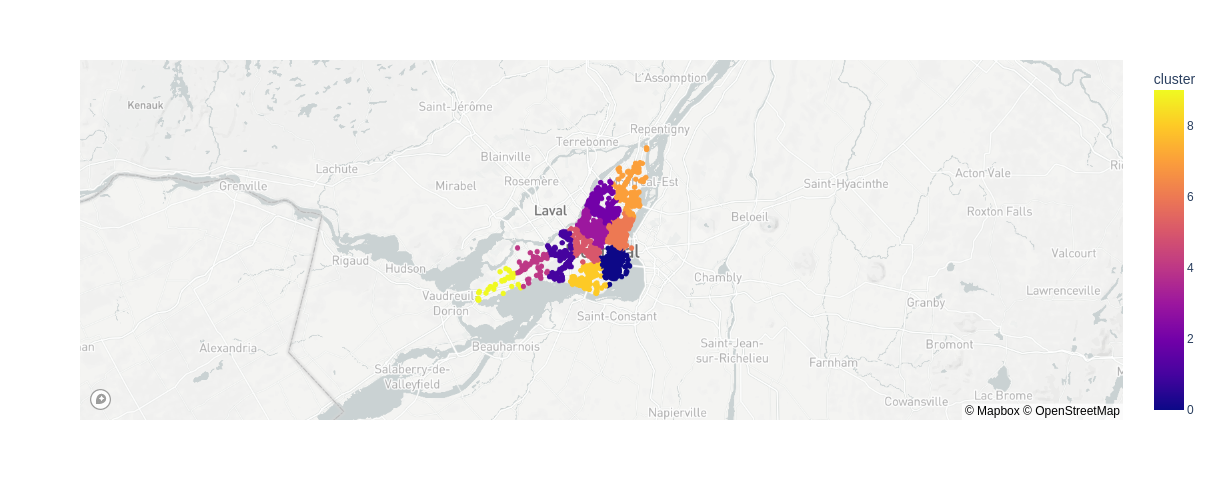

In [119]:
#Code pour mapbox
fig = px.scatter_mapbox(dfC1S,
                  lat='LOC_LAT',
                  lon='LOC_LONG',
                        color='cluster',
                        
                    height=500)

fig.show()

In [99]:
geodf = gpd.read_file('../data/limadmin.json')

In [109]:
geojson = geodf.to_json()